In [216]:
import pandas as pd
import quandl
import numpy as np
import matplotlib as plt

#startdate=raw_input('what is the start date of the analysis YYYY-MM-DD?')
#stopdate=raw_input("what is the stop date of the analysis  YYYY-MM-DD?")

quandl.ApiConfig.api_key = 'gC2qhvaCj8ha4M8vyfqC'
#data = quandl.get('NSE/OIL')
#data.head() # get all data
oil = quandl.get('NSE/OIL', start_date='2016-01-01', end_date='2016-07-17',
                  collapse='daily', transformation='rdiff',
                  column_index=4) # Use “transform=none|diff|rdiff|cumul|normalize” to get changes, % changes, cumulative sums, or returns from 100 

oilchanges = quandl.get('NSE/OIL', start_date='2016-01-01', end_date='2016-07-17',
                  collapse='daily', transformation='rdiff',
                  column_index=5) # Use “transform=none|diff|rdiff|cumul|normalize” to get changes, % changes, cumulative sums, or returns from 100 

#oilpercentchanges = quandl.get('NSE/OIL', start_date='2016-01-01', end_date='2016-07-17',
#                  collapse='daily', transformation='rdiff',
#                  rows=50,column_index=5) # Use “transform=none|diff|rdiff|cumul|normalize” to get changes, % changes, cumulative sums, or returns from 100 


comp1 = quandl.get('wiki/BP', start_date='2016-01-01', end_date='2016-07-17',
                  collapse='daily', transformation='rdiff',
                  column_index=4) # return only first 5 rows

#oilchangesList = oilchanges['Close'].tolist()
oilchangesClose=oilchanges['Close']
oilchangesVec=oilchangesClose.values
oilchangesInd=np.sign(oilchangesVec)


comp1changesClose=comp1['Close']
comp1Vec=comp1changesClose.values
comp1Ind=np.sign(comp1Vec)

#corr=0;
#for dt in oilchangesClose['Date']:
    
    
#correlator=np.dot(comp1Ind,oilchangesInd)

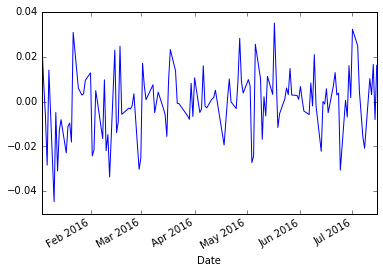

In [217]:
%matplotlib inline
oilchangesClose.plot()

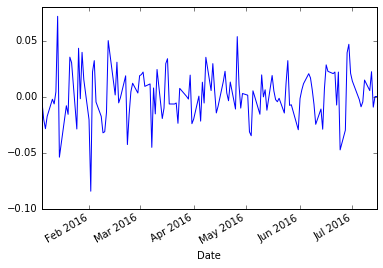

In [218]:
%matplotlib inline
comp1changesClose.plot()

(array([ 64.,   4.,  66.]),
 array([-1.5, -0.5,  0.5,  1.5]),
 <a list of 3 Patch objects>)

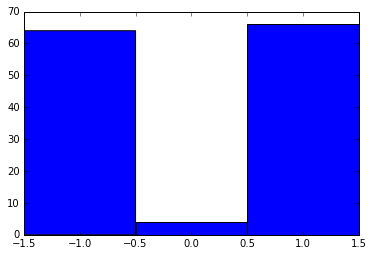

In [219]:
plt.pyplot.hist(comp1Ind, bins=[-1.5, -.5, .5, 1.5])

In [220]:
oilchangedir=oilchangesClose.apply(np.sign)
comp1changedir=comp1changesClose.apply(np.sign)

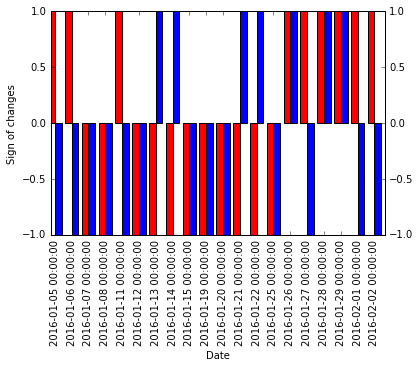

In [221]:
dates = pd.date_range('2016-01-01', periods=10)
slicedoildir=oilchangedir[0:20]
slicedcomp1dir=comp1changedir[0:20]

fig = plt.pyplot.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

slicedoildir.plot(kind='bar', color='red', ax=ax, width=width, position=1)
slicedcomp1dir.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Sign of changes')

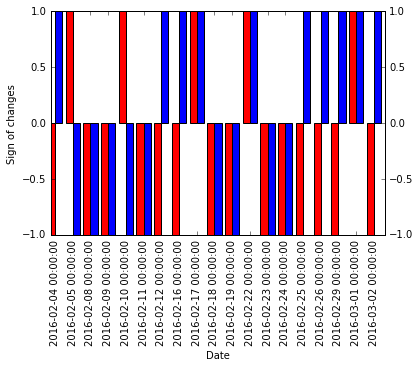

In [222]:
# correlation schematic with one day delay
dates = pd.date_range('2016-01-01', periods=10)
slicedoildir=oilchangedir[21:40]
slicedcomp1dir=comp1changedir[21:40]

fig = plt.pyplot.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

slicedoildir.plot(kind='bar', color='red', ax=ax, width=width, position=1)
slicedcomp1dir.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Sign of changes')

In [223]:
oilchangessign=oilchanges.apply(np.sign)

In [224]:
comp1sign=comp1.apply(np.sign)

In [225]:
winsize=10
minper=5

crudeoil=['ODA/POILBRE_USD']
firstcompany='GOOG/NYSE_XOM'
oilcompanies=['GOOG/LON_RDSA','GOOG/NYSE_CVX','GOOG/NYSE_COP','GOOG/FRA_TOTB','GOOG/NYSE_STO','GOOG/NYSE_E','GOOG/NYSE_PBR','GOOG/NYSE_DVN']

compdata = quandl.get(firstcompany, start_date='2016-01-01', end_date='2016-07-17',collapse='daily', transformation='rdiff',column_index=4)
corwoil=pd.rolling_corr(crude['Index Value'],compdata['Close'],window=winsize,min_periods=minper,pairwise= False,center=True)
Allcor=corwoil


for compname in oilcompanies:
    compdata = quandl.get(compname, start_date='2016-01-01', end_date='2016-07-17',
                  collapse='daily', transformation='rdiff',
                  column_index=4)
    corwoil=pd.rolling_corr(crude['Index Value'],compdata['Close'],window=winsize,min_periods=minper,pairwise= False,center=True)
    Allcor=pd.concat([Allcor, corwoil ], axis=1)
Allcor.columns=['XOM','RDSA','CVX','COP','TOTB','STO','E','PBR','DVN']

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=5,center=True,window=10).corr(other=<Series>,pairwise=False)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=5,center=True,window=10).corr(other=<Series>,pairwise=False)


In [226]:
Allcor.fillna(0)
meancor=Allcor.mean(axis=1)

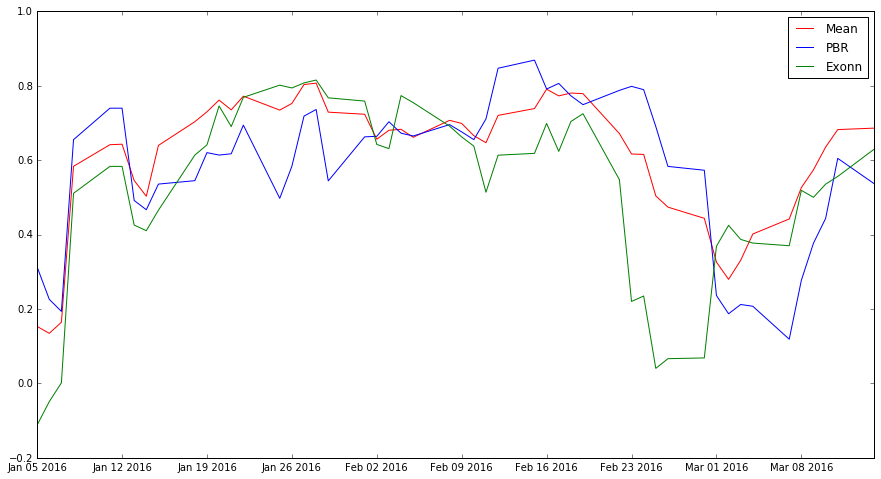

In [227]:
slicenum=50
slicedindx=meancor.index[:slicenum]
slicedmeancor=meancor.values[:slicenum]
PBRcor=Allcor['PBR'].values[:slicenum]
PBRindx=Allcor['PBR'].index[:slicenum]
XOMcor=Allcor['XOM'].values[:slicenum]
#for i, color in enumerate(['red', 'black', 'blue', 'brown', 'green'], start=1):
#    plt.plot(x, i * x + i, color=color, label='$y = {i}x + {i}$'.format(i=i))
#plt.legend(loc='best')
#plt.show()

fig = plt.pyplot.figure(figsize=(15,8))

line1, = plt.pyplot.plot(slicedindx,slicedmeancor,color='red',label='Mean')
line2, = plt.pyplot.plot(PBRindx,PBRcor,color='blue',label='PBR')
line3, = plt.pyplot.plot(slicedindx,XOMcor,color='green',label='Exonn')
plt.pyplot.legend()
#([line1,line2,line3],['Ave correlation major companies','correlation Petrobras'.'correlatio Exxon'])